In [1]:
import numpy as np
import pandas as pd

import os, sys
import random
import sklearn

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)

from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
sentiment_data = data.SentimentDataProvider('./resources/datasets/sentiment_polarity/mturk_answers.csv',
                                       './resources/datasets/sentiment_polarity/polarity_gold_lsa_topics.csv')

(4999, 1200)


Iter 00, logit: -3.010473
Iter 03, logit: -2.782851
Iter 06, logit: -2.780372
Iter 09, logit: -2.779957
Iter 12, logit: -2.779823
[0.50522958 0.49477042]
Label accuracy is 0.9147829565913183
--------------------------------------------------
Data has 1201 features
1.0
Iter 00, logit: -2.774270
Iter 03, logit: -2.376278
Iter 06, logit: -2.346626
Iter 09, logit: -2.339174
Iter 12, logit: -2.333914
(4999, 1201)
Classifier train accuracy is 0.8503700740148029
(5428, 1201)
Classifier test accuracy is 0.6997052321296978
Label accuracy is 0.9161832366473295
--------------------------------------------------
Data has 1201 features
1.0
True labels distribution [0.4994999 0.5005001]
Iter 00, logit: -2.774302
Average Raykar weight is 0.9988486287929583
Iter 03, logit: -2.376298
Average Raykar weight is 0.9997392253942331
Iter 06, logit: -2.346636
Average Raykar weight is 0.9997392253942331
Iter 09, logit: -2.339167
Average Raykar weight is 0.9997392253942331
Iter 12, logit: -2.333918
Average Rayk

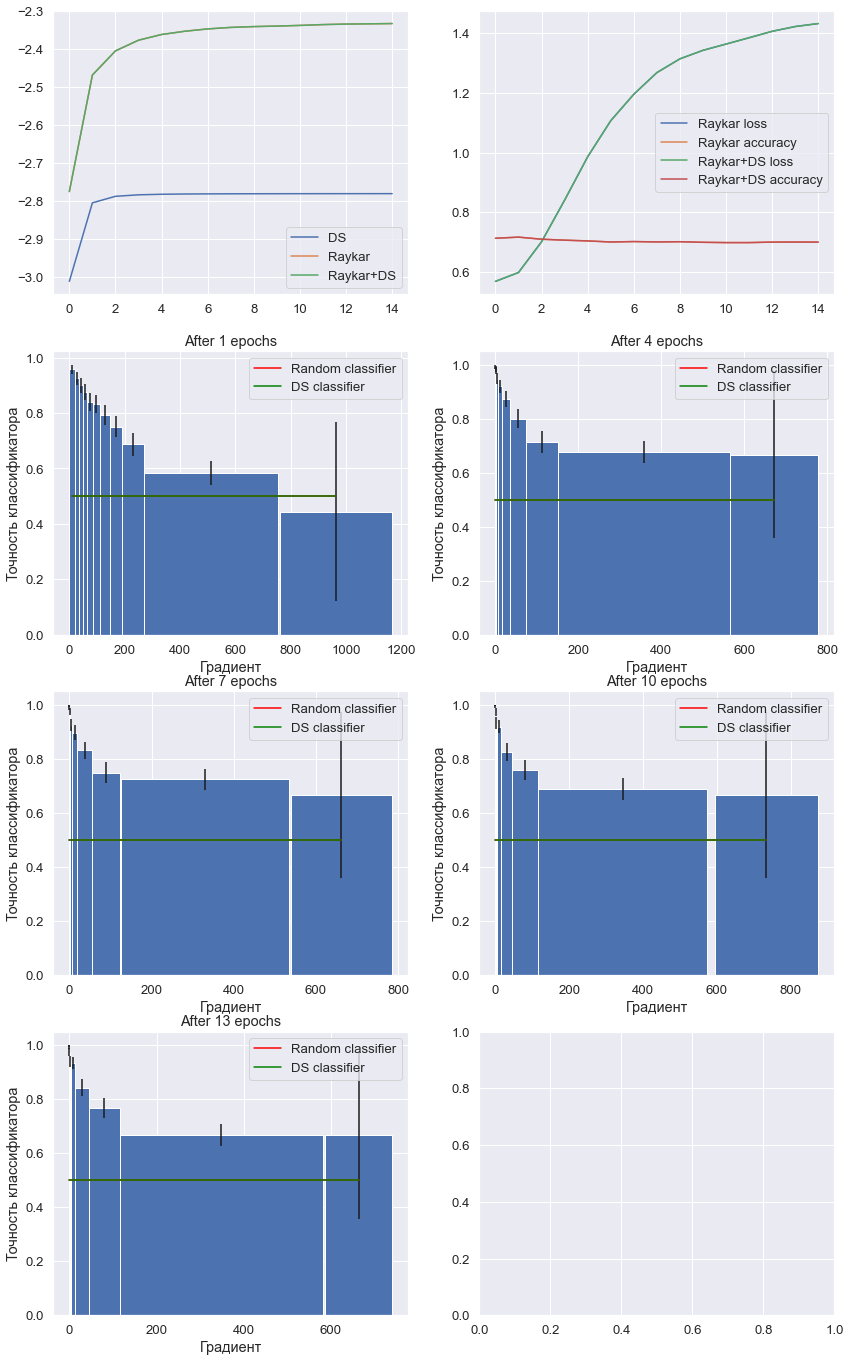

In [14]:
reload_all()
sentiment_methods, sentiment_points, advantages_matrix = bm.compare_methods(sentiment_data, max_iter=15, lr=1)

Number of data points: 4999
[0.4994999 0.5005001]
0.50000050020006
[0.975      0.9425     0.94       0.925      0.92       0.8775
 0.8775     0.8575     0.7675     0.7875     0.695      0.6425
 0.62311558]
[8.4000000e-04 2.5110000e-02 1.3055000e-01 5.5654000e-01 1.5076600e+00
 3.4748700e+00 6.5586000e+00 1.0763310e+01 1.8744750e+01 3.5622820e+01
 5.1684170e+01 1.1977911e+02 4.9128720e+02]
[0. 0. 0. 0. 0.]


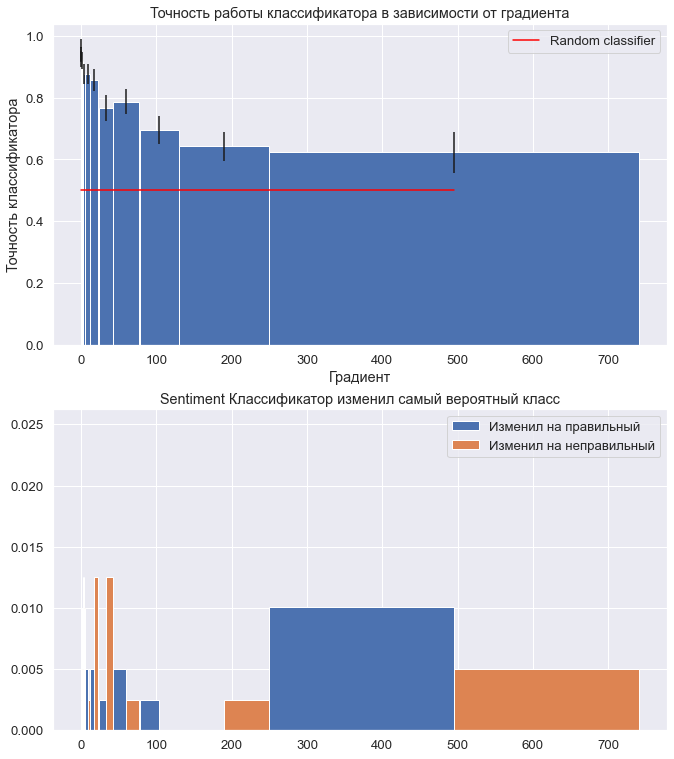

In [24]:
reload_all()
n = 400
buckets, confidences, max_grad, rnd_accuracy = bm.build_grad_hist(sentiment_data, sentiment_methods, sentiment_points, 'Sentiment', n, train=True)
confidence_sentiment = bm.get_confidence(buckets, confidences, rnd_accuracy)

In [9]:
# buckets, confidences, _, rnd_accuracy = bm.build_grad_hist(sentiment_data, sentiment_methods, sentiment_points, 'Sentiment', n, train=False)
# confidence_sentiment = bm.get_confidence(buckets, confidences, rnd_accuracy)

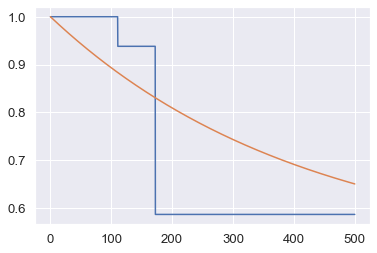

In [19]:
xs = np.linspace(0, 500, 1500)
ys = list(map(lambda x: confidence_sentiment(x), xs))
plt.plot(xs, ys)
lambda2 = lambda x: 0.5 * np.exp(-x / max_grad) + 0.5
plt.plot(xs, list(map(lambda2, xs)))

Iter 00, logit: -3.010473
Iter 04, logit: -2.781380
Iter 08, logit: -2.780043
Iter 12, logit: -2.779823
Iter 16, logit: -2.779763
[0.50543171 0.49456829]
Label accuracy is 0.9147829565913183
--------------------------------------------------
Data has 601 features
1.0
Iter 00, logit: -2.875684
Iter 04, logit: -2.613285
Iter 08, logit: -2.610890
Iter 12, logit: -2.610591
Iter 16, logit: -2.610530
(4999, 601)
Classifier train accuracy is 0.7135427085417083
(5428, 601)
Classifier test accuracy is 0.6354089904200442
Label accuracy is 0.9159831966393278
--------------------------------------------------
Data has 601 features
1.0
Iter 00, logit: -2.876375
Average Raykar weight is 0.96824224844969
Iter 04, logit: -2.613554
Average Raykar weight is 0.9770118823764753
Iter 08, logit: -2.611052
Average Raykar weight is 0.9779451090218044
Iter 12, logit: -2.610741
Average Raykar weight is 0.9780192838567713
Iter 16, logit: -2.610645
Average Raykar weight is 0.9784657731546308
Average Raykar weight

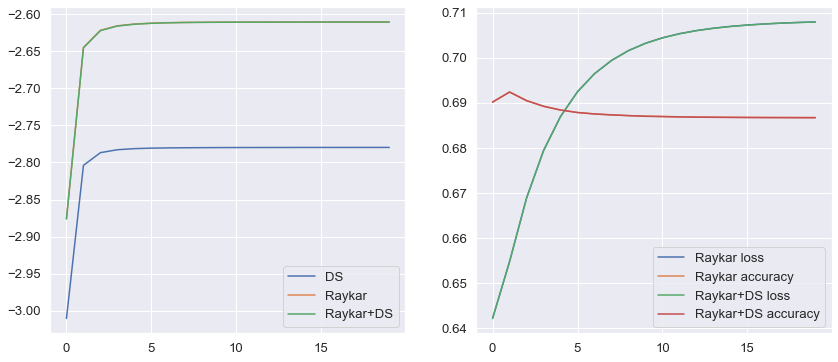

In [20]:
reload_all()
sentiment_methods, sentiment_points, advantages_matrix = bm.compare_methods(sentiment_data, max_iter=20, lr=0.001, 
                                                                            confidence_estimator=confidence_sentiment)

In [126]:
# [('DS', 0.9147829565913183), ('Raykar', 0.9157831566313263), ('Raykar+DS', 0.9169833966793358)]
sentiment_points[sentiment_points.task.isin(advantages_matrix[0][2])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
6,15,"[0.146, 0.854]","[-5.897, -4.113]","[0.769, 0.231]","[-5.571, -4.273]","[0.924, 0.076]","[14.83327, 4.40766, 2.14734, 1.60273, 1.45582,...","[0.763, 0.237]","[-5.576, -4.267]","[0.923, 0.077]",1.49043,"[1.0, 0.0]",6
165,332,"[0.179, 0.821]","[-4.782, -3.238]","[0.537, 0.463]","[-4.782, -3.377]","[0.826, 0.174]","[47.9769, 29.33831, 19.37662, 13.69428, 11.343...","[0.532, 0.468]","[-4.782, -3.38]","[0.822, 0.178]",10.31810,"[1.0, 0.0]",165
169,339,"[0.31, 0.69]","[-6.77, -5.949]","[0.883, 0.117]","[-6.73, -6.132]","[0.932, 0.068]","[68.39146, 21.47939, 11.87566, 7.75092, 6.5767...","[0.877, 0.123]","[-6.73, -6.121]","[0.929, 0.071]",7.92778,"[1.0, 0.0]",169
767,1577,"[0.433, 0.567]","[-6.356, -6.064]","[0.677, 0.323]","[-6.184, -5.991]","[0.717, 0.283]","[136.08322, 99.88995, 75.28199, 65.85026, 60.7...","[0.622, 0.378]","[-6.213, -6.005]","[0.709, 0.291]",53.65238,"[0.805, 0.195]",767
1170,2412,"[0.196, 0.804]","[-7.402, -5.967]","[0.728, 0.272]","[-7.085, -6.003]","[0.888, 0.112]","[68.74859, 13.70859, 6.87314, 7.51306, 8.86324...","[0.717, 0.283]","[-7.093, -5.997]","[0.883, 0.117]",12.69513,"[1.0, 0.0]",1170
1352,2805,"[0.167, 0.833]","[-4.596, -2.97]","[0.944, 0.056]","[-4.72, -3.099]","[0.988, 0.012]","[69.87058, 16.04984, 2.77404, 0.62212, 0.29551...","[0.94, 0.06]","[-4.722, -3.092]","[0.988, 0.012]",0.23604,"[1.0, 0.0]",1352
1640,3412,"[0.245, 0.755]","[-6.431, -5.283]","[0.716, 0.284]","[-6.31, -5.43]","[0.859, 0.141]","[75.24323, 26.65058, 13.65087, 11.77671, 12.50...","[0.712, 0.288]","[-6.32, -5.401]","[0.861, 0.139]",13.71984,"[1.0, 0.0]",1640
1666,3475,"[0.031, 0.969]","[-5.811, -2.342]","[0.569, 0.431]","[-5.802, -2.421]","[0.975, 0.025]","[28.11958, 5.14125, 1.37776, 0.60173, 0.40357,...","[0.565, 0.435]","[-5.795, -2.435]","[0.974, 0.026]",0.29585,"[1.0, 0.0]",1666
1718,3585,"[0.414, 0.586]","[-6.724, -6.355]","[0.525, 0.475]","[-6.584, -6.34]","[0.585, 0.415]","[36.36916, 34.55167, 31.03707, 28.94314, 27.85...","[0.523, 0.477]","[-6.588, -6.336]","[0.585, 0.415]",26.22920,"[0.999, 0.001]",1718
1733,3614,"[0.223, 0.777]","[-6.222, -4.951]","[0.9, 0.1]","[-5.885, -5.354]","[0.939, 0.061]","[73.88094, 24.87131, 8.11978, 3.99059, 2.91868...","[0.899, 0.101]","[-5.886, -5.352]","[0.938, 0.062]",2.28964,"[1.0, 0.0]",1733


In [11]:
sentiment_points[sentiment_points.task.isin(advantages_matrix[0][2])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
6,15,"[0.147, 0.853]","[-5.896, -4.114]","[0.998, 0.002]","[-5.497, -4.372]","[0.999, 0.001]","[22.8868, 3.84659, 0.54705, 0.05191, 0.00631, ...","[0.998, 0.002]","[-5.497, -4.372]","[0.999, 0.001]",0.00013,"[1.0, 0.0]",6
228,448,"[0.001, 0.999]","[-9.733, -2.354]","[1.0, 0.0]","[-8.479, -2.681]","[1.0, 0.0]","[28.25029, 1.92859, 0.44894, 0.10326, 0.0154, ...","[1.0, 0.0]","[-8.479, -2.681]","[1.0, 0.0]",0.00000,"[1.0, 0.0]",228
319,646,"[0.439, 0.561]","[-5.236, -4.97]","[0.848, 0.152]","[-5.485, -5.017]","[0.899, 0.101]","[31.62113, 33.2905, 26.29533, 19.20885, 13.658...","[0.848, 0.152]","[-5.485, -5.017]","[0.899, 0.101]",1.41809,"[1.0, 0.0]",319
391,793,"[0.068, 0.932]","[-6.458, -3.819]","[1.0, 0.0]","[-6.033, -3.834]","[1.0, 0.0]","[132.129, 38.88611, 37.13401, 44.53918, 37.837...","[1.0, 0.0]","[-6.033, -3.834]","[1.0, 0.0]",0.00000,"[1.0, 0.0]",391
550,1132,"[0.0, 1.0]","[-10.258, -1.824]","[0.998, 0.002]","[-9.765, -2.09]","[1.0, 0.0]","[56.25735, 6.08816, 0.34864, 0.02559, 0.00462,...","[0.998, 0.002]","[-9.765, -2.09]","[1.0, 0.0]",0.00000,"[1.0, 0.0]",550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,9927,"[0.857, 0.143]","[-6.757, -8.525]","[0.0, 1.0]","[-6.802, -6.729]","[0.0, 1.0]","[131.54899, 12.11796, 1.13524, 0.12062, 0.0193...","[0.0, 1.0]","[-6.802, -6.729]","[0.0, 1.0]",0.00002,"[1.0, 0.0]",4757
4762,9940,"[0.589, 0.411]","[-4.525, -4.861]","[0.074, 0.926]","[-4.512, -4.465]","[0.078, 0.922]","[120.45696, 61.05111, 43.26389, 32.68274, 22.0...","[0.074, 0.926]","[-4.512, -4.465]","[0.078, 0.922]",8.38071,"[1.0, 0.0]",4762
4838,10122,"[0.714, 0.286]","[-5.258, -6.153]","[0.0, 1.0]","[-5.451, -5.911]","[0.0, 1.0]","[54.56989, 7.41009, 0.2849, 0.00322, 6e-05, 0....","[0.0, 1.0]","[-5.451, -5.911]","[0.0, 1.0]",0.00000,"[1.0, 0.0]",4838
4932,10308,"[0.998, 0.002]","[-3.515, -9.91]","[0.001, 0.999]","[-3.541, -4.675]","[0.0, 1.0]","[70.18876, 25.22411, 4.97671, 0.55902, 0.04879...","[0.001, 0.999]","[-3.541, -4.675]","[0.0, 1.0]",0.00013,"[1.0, 0.0]",4932


[0.0, 0.0, 0.00021, 0.0, 1e-05, 3.84407, 0.10848, 208.6754, 0.0, 2e-05, 0.0, 0.0, 0.25472, 0.0, 0.0, 31.2705, 0.0, 3.95774, 0.0, 0.0, 0.11129, 0.0, 21.73657, 0.00083, 0.0, 0.0, 0.14754, 0.00399, 0.00205, 0.0, 7e-05, 0.01447, 0.0, 0.0, 0.0, 0.0, 0.00256, 0.13953, 0.00048, 0.0, 0.24411, 0.0, 1e-05, 0.00014, 0.0, 0.0, 0.00817, 0.00277, 0.0, 9e-05, 0.0, 0.00108, 236.18478, 0.0, 0.0, 0.0, 0.00064, 6.81898, 1e-05, 6.57983, 0.1828, 0.00896, 0.0, 18.61506, 0.6993, 0.0685, 0.58262, 0.10091, 9e-05, 0.0, 0.0, 0.0, 0.00619, 0.0, 0.0, 0.0]
76 70


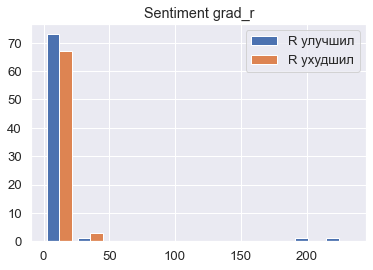

In [10]:
reload_all()
bm.plot_flips(sentiment_points[sentiment_points.task.isin(advantages_matrix[2][0])], 
              sentiment_points[sentiment_points.task.isin(advantages_matrix[0][2])], 'grad_r', 'Sentiment', 'R улучшил', 'R ухудшил')

76 70


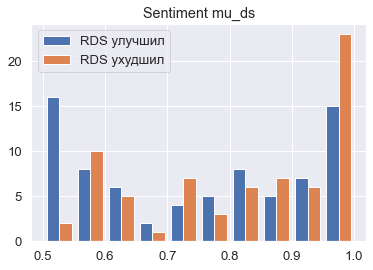

In [13]:
reload_all()
bm.plot_flips(sentiment_points[sentiment_points.task.isin(advantages_matrix[2][0])], 
              sentiment_points[sentiment_points.task.isin(advantages_matrix[0][2])], 'mu_ds', 'Sentiment', 'RDS улучшил', 'RDS ухудшил')

In [ ]:
bm.plots_for_point(sentiment_points, sentiment_data, sentiment_methods, 4624)

In [ ]:
def scatter_cls(pts):
    print(len(pts))
    r = list(map(lambda x: x[0], pts['classifier_r']))
    rds = list(map(lambda x: x[0], pts['classifier_rds']))
    plt.scatter(r, rds)
    
scatter_cls(sentiment_points[sentiment_points.task.isin(advantages_matrix[0][1])])

In [ ]:
res = []
for _, row in sentiment_points.iterrows():
    res.append(row.conf_mx_r + np.log(row.classifier_r) + np.log(row.classifier_rds))
res = np.array(res)
res = np.exp(res)
res = sklearn.preprocessing.normalize(res, axis=1, norm='l1')

estimates = {}
for i, row in sentiment_points.iterrows():
    estimates[row['task']] = sentiment_methods[2].values[np.argmax(res[i])]
    
    all_points = 0
accepted = 0

for point in sentiment_data.gold():
    if point.task in estimates:
        estimate = estimates[point.task]
        all_points += 1
        if point.value == estimate:
            accepted += 1

accuracy = accepted / all_points

accuracy

In [ ]:
reload_all()
bm.boosting_classifiers_distr(sentiment_points[sentiment_points.task.isin(advantages_matrix[1][0])],
                              sentiment_points[sentiment_points.task.isin(advantages_matrix[0][1])], 'Sentiment') 

In [ ]:
reload_all()
bm.plot_all_gradients(sentiment_points[sentiment_points.task.isin(advantages_matrix[1][0])],
                              sentiment_points[sentiment_points.task.isin(advantages_matrix[0][1])], 'Sentiment') 

1.0


(0.5020265291083272, 0.5117907148120855)

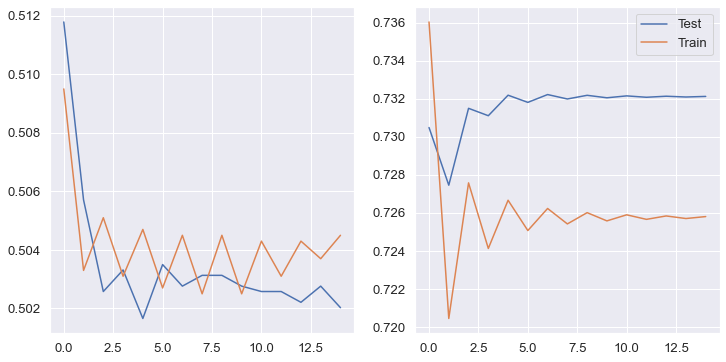

In [15]:
reload_all()
bm.run_mv_classifier(sentiment_data, iters=15, n_classes=2, lr=0.001, C=1, hard=False)

0.1


(0.6331982313927782, 0.637988209285188)

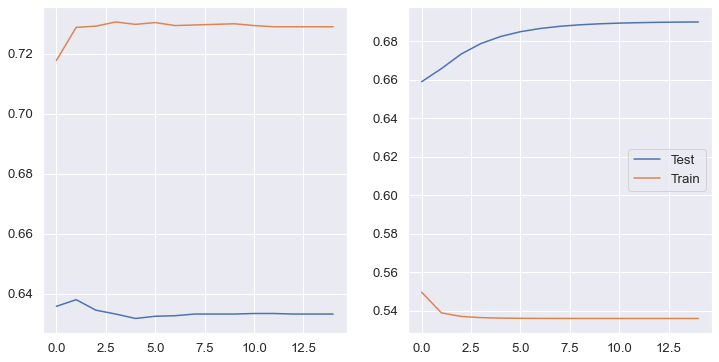

In [14]:
reload_all()
bm.run_mv_classifier(sentiment_data, iters=15, n_classes=2, lr=0.001, C=0.1, hard=True)

In [ ]:
reload_all()
bm.mv_hard(sentiment_data, C=10000)

In [ ]:
X_train, y_train = bm.features2np(sentiment_data)


In [ ]:
np.linalg.norm(X_train, axis=1).max()

In [40]:
sentiment_methods[1].classifier.w

array([-3.58168389e-01,  1.80215627e-01, -7.40812271e-01,  2.42682521e-01,
       -3.91625425e+00, -4.92044109e+00, -1.63220863e+00,  4.51832295e-01,
       -2.95368595e+00, -5.27307062e+00,  1.43162145e+00, -1.80169339e+00,
       -3.72547889e+00, -6.45002896e-01,  1.26808397e+00,  3.42638224e+00,
        2.74852291e-01, -3.13452006e-01,  1.67848700e+00, -8.83116314e-01,
        3.69244250e-01,  1.55585867e+00, -2.51150842e+00, -8.43810930e-01,
       -5.86109208e-01, -6.12490224e-01, -1.55836993e+00, -1.44830698e+00,
       -1.30665589e+00, -1.12397387e+00, -2.67175494e+00,  8.82381686e-01,
        4.19690759e-02, -9.46375926e-01, -1.56281297e+00, -1.17256249e-01,
        8.79345141e-01,  2.46649574e+00,  1.05487880e+00, -8.33329190e-01,
        2.93396241e-01, -1.55979989e+00, -8.58719833e-01,  6.45070658e-01,
       -5.22990833e-01, -2.69387531e-01, -2.00940344e+00,  1.55104416e+00,
       -1.41782193e+00,  1.31563378e+00,  1.32006698e+00,  1.86361780e+00,
       -2.72612146e+00, -

In [79]:
sentiment_methods[1].classifier.w

array([-1.84831459e-03,  1.02734484e-03, -6.99038118e-04,  1.13026621e-04,
       -1.11088145e-02, -1.65643692e-02, -7.07175974e-03, -1.89309733e-04,
       -1.16036165e-02, -9.03754090e-03,  7.20098371e-03, -7.22246730e-03,
       -1.26284815e-02, -4.51681893e-03,  4.82818293e-03,  9.70389298e-03,
        2.75644617e-03, -2.11918014e-03,  7.24488957e-03, -2.99789735e-03,
        2.56615039e-03,  5.90194160e-03, -1.02351124e-02, -3.74069479e-03,
       -2.21468485e-03,  6.17191532e-05, -5.11740786e-03, -9.02374944e-03,
       -1.50452541e-03, -5.56008620e-03, -8.71468031e-03,  2.45391473e-03,
        1.79254263e-03, -4.95579945e-03, -5.12577685e-03, -1.90636833e-04,
        3.31758573e-03,  1.49978345e-02,  7.64964304e-03, -5.04052836e-03,
        1.85988709e-03, -7.52796442e-03,  1.85536537e-05,  9.75420858e-04,
       -1.90814147e-03, -3.16362871e-03, -5.54468069e-03,  5.09245812e-03,
       -8.43013367e-03,  5.35376687e-03,  7.60909432e-03,  9.41355616e-03,
       -1.50903224e-02, -

In [103]:
_, y = sentiment_data.test()

In [4]:
x = list(map(lambda x: x.value, sentiment_data.gold()))

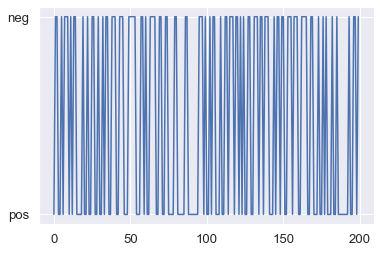

In [5]:
plt.plot(x[:200])